FIR ( Finite Impulse Response) models are a kind of dynamic models that describe the dynamic response of an output with respect to input. 
In this workbook, we will first generate a dynamic dataset (input-output pair) , then model the dynamics using FIR model , and finally compare the output with the FIR-model prediction

In [130]:
import scipy
import scipy.signal
import matplotlib.pyplot as plt
import numpy as np

In [131]:
#create a lti 
G = scipy.signal.lti([4],[10,1])

In [132]:
#create an input array
u= np.ones(400)
#make random step signals
u[0:20] = 0
u[100:110]=0
u[200:250]=0


In [133]:
#simulate the transfer function using input array and time
ysim = scipy.signal.lsim(G,U=u,T=t)[1]

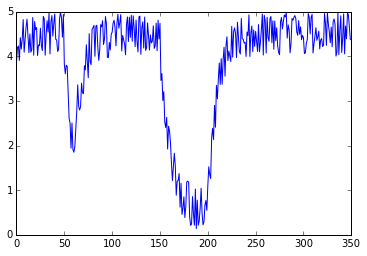

In [134]:
%matplotlib inline
plt.plot(y)

In [135]:
#create a white noise
noise = np.random.rand(400)

In [136]:
#add noise with signal
y_noisy = ysim + noise

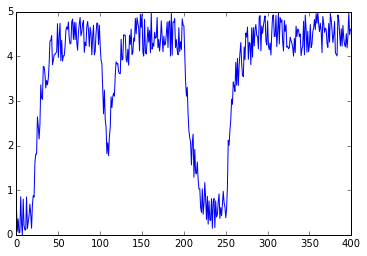

In [137]:
plt.plot(y_noisy)

a fir model is defined as follows
$$y_t


In [138]:
#estimated deadtime and steady state time
dt = 0
ss = 50

A FIR modeling problem is represented by the equation Y = BU , where Y is the output vector , U is the matrix of input data points. B is the FIR-Coefficient vector to be found.

## for the explanation of how the B is calculated , refer to the following link.
http://stats.stackexchange.com/questions/46151/how-to-derive-the-least-square-estimator-for-multiple-linear-regression?newreg=8eb9900cbff14cacae354537de3e928b

In [142]:
u = u.reshape(-1,1)
# we will slice out first "ss" data points from the output. 
y = y_noisy[ss:].reshape(-1,1)

In [143]:
U = np.ones(y.size).reshape(-1,1) 


In [144]:
for i in range(ss):
    U = np.hstack((U,u[i:(u.size-ss+i)]))

In [145]:
UT = U.transpose()

In [146]:
B=((np.linalg.inv(UT.dot(U))).dot(UT)).dot(y)

In [147]:
y_model = U.dot(B)

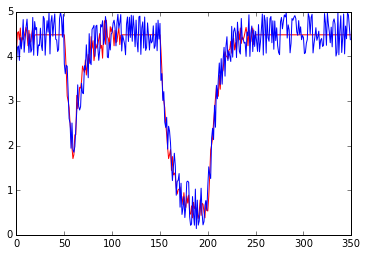

In [148]:
plt.plot(y_model,'r')
plt.plot(yn)